Method 1


c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:139: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


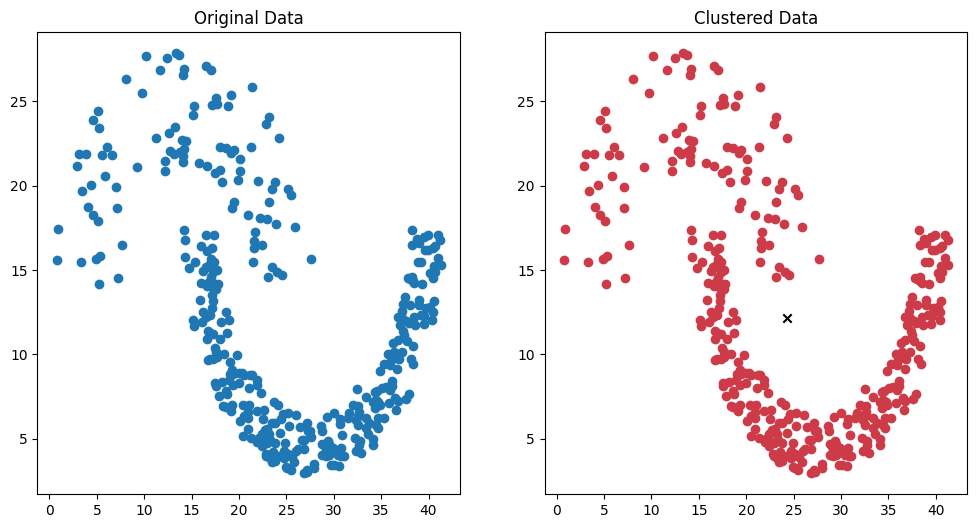

Method 2


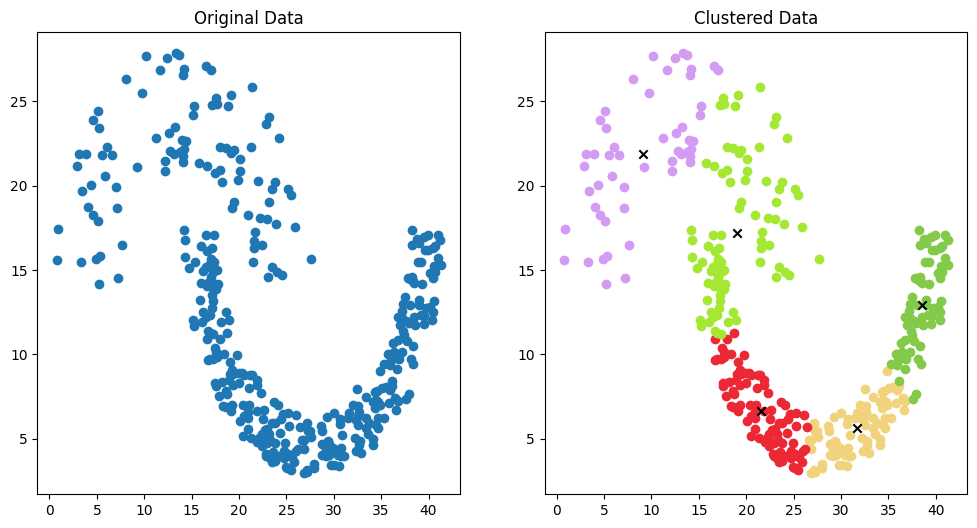

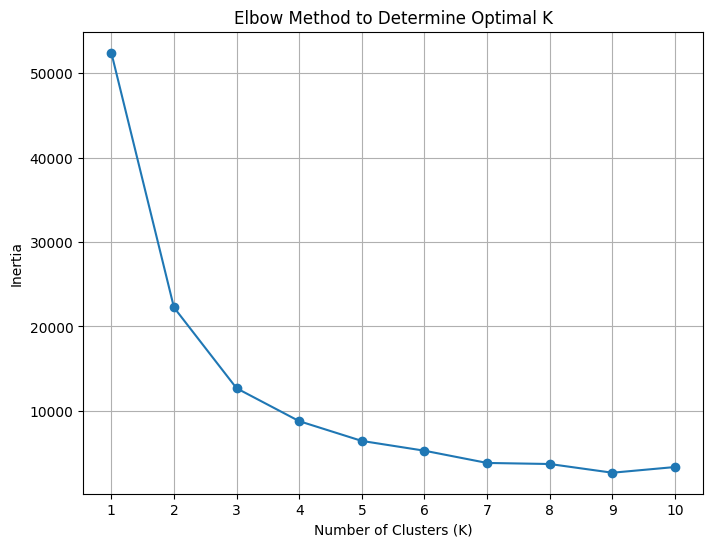

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import randomcolor

K = 5
FILENAME = 'jane.txt'


def read_data(filename):
    with open(filename, 'r') as f:
        data = np.loadtxt(f, delimiter='\t')
    return data
        
def kmeans_method1(data, k, max_iter=1000):
    clusters = np.random.randint(0, k, size=data.shape[0])
    
    centroids = np.array([np.mean(data[clusters == i], axis=0)[:-1] for i in range(k)])
    
    change = True
    for _ in range(max_iter):
        if not change:
            break
        
        change = False
        for i, point in enumerate(data):
            distances = np.linalg.norm(centroids - point[:-1], axis=1)
            new_cluster = np.argmin(distances)
            
            if clusters[i] != new_cluster:
                change = True
                clusters[i] = new_cluster
    
        
        for i in range(k):
            new_centroid = np.mean(data[clusters == i], axis=0)[:-1]
            if not np.array_equal(centroids[i], new_centroid):
                change = True
                centroids[i] = new_centroid
                
    return clusters, centroids
        
def kmeans_method2(data, k, max_iter=1000):
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    clusters = np.zeros(data.shape[0])
    change = True
    
    for _ in range(max_iter):
        if not change:
            # print('Converged after {} iterations'.format(_))
            break
        
        change = False
        for i, point in enumerate(data):
            clusters[i] = np.argmin(np.linalg.norm(centroids - point, axis=1))
            
        for i in range(k):
            new_centroid = np.mean(data[clusters == i], axis=0)
            if not np.array_equal(centroids[i], new_centroid):
                change = True
                centroids[i] = new_centroid
            
    return clusters, centroids
    
def display_kmeans(data, clusters, centroids):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    ax[0].scatter(data[:, 0], data[:, 1])
    ax[0].set_title('Original Data')
    
    colors = randomcolor.RandomColor().generate(count=K)
    for i in range(K):
        ax[1].scatter(data[clusters == i, 0], data[clusters == i, 1], c=colors[i])
        ax[1].scatter(centroids[i, 0], centroids[i, 1], c='black', marker='x')
    ax[1].set_title('Clustered Data')
    
    plt.show()

def elbow_method(data, max_k=10):
    inertias = []
    for k in range(1, max_k + 1):
        clusters, centroids = kmeans_method2(data, k)
        inertia = sum(
            np.sum(np.linalg.norm(data[clusters == i] - centroids[i], axis=1) ** 2)
            for i in range(k)
        )
        inertias.append(inertia)
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), inertias, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method to Determine Optimal K')
    plt.xticks(range(1, max_k + 1))
    plt.grid()
    plt.show()

    
print('Method 1')
display_kmeans(read_data(FILENAME), *kmeans_method1(read_data(FILENAME), K, 10000))
print('Method 2')
display_kmeans(read_data(FILENAME), *kmeans_method2(read_data(FILENAME), K, 10000))

elbow_method(read_data(FILENAME), 10)





    
    

    